In [1]:
import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns

from upsetplot import generate_counts, UpSet
from matplotlib_venn import venn2, venn2_circles

In [2]:
gel_slice_anox = pd.read_excel('./Gel_slices_gr2/EbN1_slice2_Bz_anoxic_G2.xlsx')

gel_slice_ox = pd.read_excel('./Gel_slices_gr2/EbN1_slice2_Bz_oxic_G2.xlsx')

In [3]:
gel_slice_anox.head(3)

,Accession,Protein,MW [kDa],pI,Scores,#Peptides,SC [%],#Alt. Proteins,RMS [Da]
0,EbN1_C05020,pheA prephenate dehydratase AND chorismate mut...,38.343847,6.024432,95.2 (M.score:95.2),2,7.909605,1,0.031916
1,EbN1_C05360,ilvE branched-chain-amino-acid transaminase 58...,34.283378,6.022426,348.4 (M.score:348.4),8,21.895425,1,0.051720
2,EbN1_C05540,"takP1 TRAP transporter, periplasmic binding pr...",39.577022,9.341917,104.0 (M.score:104.0),1,3.888889,1,0.005793


In [4]:
gel_slice_anox.tail(3)

,Accession,Protein,MW [kDa],pI,Scores,#Peptides,SC [%],#Alt. Proteins,RMS [Da]
36,EbN1_C41390,acuI2 acrylyl-CoA reductase (NADPH) 4259521:42...,35.698532,6.000928,310.8 (M.score:310.8),6,25.602410,1,0.054225
37,EbN1_PI00630,EbN1_PI00630 hypothetical protein 51430:52332 ...,33.321371,8.289482,34.4 (M.score:34.4),1,3.000000,1,0.042548
38,EbN1_PII01810,EbN1_PII01810 putative aldo-keto reductase 204...,37.194949,6.182287,125.1 (M.score:125.1),2,7.142857,1,0.029110


### Define function to;
* Remove trailing spaces
* cast all col.names to lower case
* remove score in parenthesis in scores
* takes only peptides  > o 

In [5]:
def oxy_clean_and_filter_dfs(dfs):
    """
    Clean the 'Scores' column in a list of dataframes and filter rows where '#Peptides' is not equal to 0.
    Also, remove trailing spaces from all columns and convert column names to lowercase.

    Args:
        dfs (list of pandas.DataFrame): List of dataframes to process.

    Returns:
        list of pandas.DataFrame: List of processed dataframes.
    """
    processed_dfs = []
    for df in dfs:
        
        # Convert column names to lowercase
        df.columns = df.columns.str.lower()
        
        # Clean the 'Scores' column to remove values within parentheses
        df['scores'] = df['scores'].str.replace(r'\(.*\)', '', regex=True)
        df["scores"] = df["scores"].astype(float)

        # Remove trailing spaces only from columns of type 'object'
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

        df = df[df['#peptides'] != 0]   # Remove rows where '#Peptides' is 0

        processed_dfs.append(df)

    return processed_dfs


In [6]:
dfs_dirty = [gel_slice_anox,gel_slice_ox ]

In [7]:
dfs_cleaned = oxy_clean_and_filter_dfs(dfs_dirty)

In [8]:
gel_slice_anox = dfs_cleaned[0]
gel_slice_ox = dfs_cleaned[1]

In [9]:
gel_slice_ox.head(5)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00080,"EbN1_C00080 Conserved hypothetical protein, DU...",31.174752,4.880996,27.9,1,4.609929,1,0.000326
1,EbN1_C05020,pheA prephenate dehydratase AND chorismate mut...,38.343847,6.024432,108.0,2,7.627119,1,0.059283
2,EbN1_C05360,ilvE branched-chain-amino-acid transaminase 58...,34.283378,6.022426,118.2,1,3.267974,1,0.014985
3,EbN1_C05540,"takP1 TRAP transporter, periplasmic binding pr...",39.577022,9.341917,35.2,1,3.888889,1,0.011207
4,EbN1_C05550,"takP2 TRAP transporter, periplasmic binding pr...",39.723954,8.894983,50.5,1,3.888889,1,0.019381


In [10]:
gel_slice_ox.tail(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
43,EbN1_C41390,acuI2 acrylyl-CoA reductase (NADPH) 4259521:42...,35.698532,6.000928,94.0,2,4.518072,1,0.045166
44,EbN1_PI00630,EbN1_PI00630 hypothetical protein 51430:52332 ...,33.321371,8.289482,214.2,5,20.333333,1,0.068493
45,EbN1_PII01810,EbN1_PII01810 putative aldo-keto reductase 204...,37.194949,6.182287,60.9,1,2.976190,1,0.038919


In [11]:
total_zero_peptides = 0  # Initialize the total count
    
for i, df in enumerate(dfs_dirty, start=1):
    zero_peptides_count = len(df[df['#peptides'] == 0])
    total_zero_peptides += zero_peptides_count

    print(f"grp {i} has {zero_peptides_count} proteins identified by 0 peptide.")
print()
print(f"Total number of proteins identified by 0 peptide: {total_zero_peptides}")

grp 1 has 0 proteins identified by 0 peptide.
grp 2 has 1 proteins identified by 0 peptide.

Total number of proteins identified by 0 peptide: 1


In [12]:
gel_slice_ox.head(2)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00080,"EbN1_C00080 Conserved hypothetical protein, DU...",31.174752,4.880996,27.9,1,4.609929,1,0.000326
1,EbN1_C05020,pheA prephenate dehydratase AND chorismate mut...,38.343847,6.024432,108.0,2,7.627119,1,0.059283


In [13]:
gel_slice_anox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accession       39 non-null     object 
 1   protein         39 non-null     object 
 2   mw [kda]        39 non-null     float64
 3   pi              39 non-null     float64
 4   scores          39 non-null     float64
 5   #peptides       39 non-null     int64  
 6   sc [%]          39 non-null     float64
 7   #alt. proteins  39 non-null     int64  
 8   rms [da]        39 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.0+ KB


In [14]:
gel_slice_ox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 45
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accession       45 non-null     object 
 1   protein         45 non-null     object 
 2   mw [kda]        45 non-null     float64
 3   pi              45 non-null     float64
 4   scores          45 non-null     float64
 5   #peptides       45 non-null     int64  
 6   sc [%]          45 non-null     float64
 7   #alt. proteins  45 non-null     int64  
 8   rms [da]        45 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.5+ KB


In [15]:
print(gel_slice_anox['protein'].nunique())
print(gel_slice_ox['protein'].nunique ())

39
45


### Satistical Analysis

In [16]:
gel_slice_anox.describe().T

,count,mean,std,min,25%,50%,75%,max
mw [kda],39.0,34.345755,6.467123,11.099714,33.405503,35.009623,37.122569,48.667737
pi,39.0,6.556691,1.372773,4.951269,5.600506,6.022426,7.721950,9.625789
scores,39.0,175.338462,264.286711,25.600000,34.450000,82.700000,221.350000,1558.200000
#peptides,39.0,3.282051,3.999663,1.000000,1.000000,2.000000,4.000000,22.000000
sc [%],39.0,11.763279,11.538742,2.272727,3.847559,7.909605,16.681134,65.191740
#alt. proteins,39.0,1.051282,0.223456,1.000000,1.000000,1.000000,1.000000,2.000000
rms [da],39.0,0.099278,0.124742,0.001273,0.037411,0.058440,0.082508,0.528548


In [17]:
gel_slice_ox.describe().T

,count,mean,std,min,25%,50%,75%,max
mw [kda],45.0,35.822099,4.176394,18.942158,33.983810,36.602931,38.343847,42.059851
pi,45.0,6.548614,1.667275,4.880996,5.393097,6.011003,7.089604,12.317849
scores,45.0,122.051111,152.058665,25.200000,41.800000,65.500000,118.200000,772.400000
#peptides,45.0,2.288889,2.501111,1.000000,1.000000,1.000000,2.000000,11.000000
sc [%],45.0,8.743850,9.439953,2.253521,3.519062,4.609929,9.764310,44.542773
#alt. proteins,45.0,1.022222,0.149071,1.000000,1.000000,1.000000,1.000000,2.000000
rms [da],45.0,0.043541,0.024283,0.000326,0.030391,0.044704,0.056605,0.115044


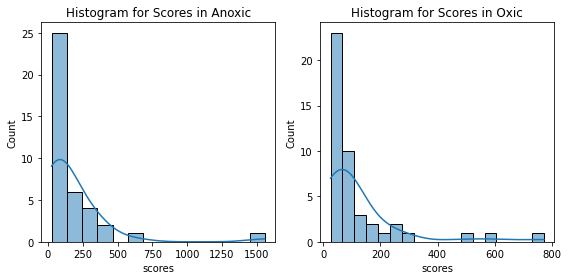

In [18]:
data1 = gel_slice_anox['scores']
data2 = gel_slice_ox['scores']

# Create subplots with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot histograms on the first axis
sns.histplot(data=data1, ax=ax1, kde=True)
ax1.set_title("Histogram for Scores in Anoxic")

# Plot histograms on the second axis
sns.histplot(data=data2, ax=ax2, kde=True)
ax2.set_title("Histogram for Scores in Oxic")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


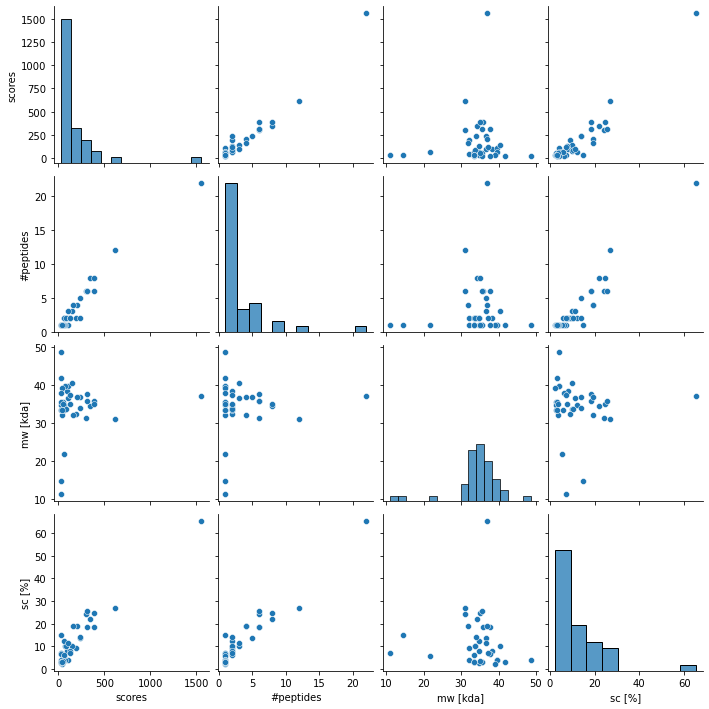

In [19]:
sns.pairplot(data=gel_slice_anox, vars=['scores', '#peptides', 'mw [kda]', 'sc [%]'])


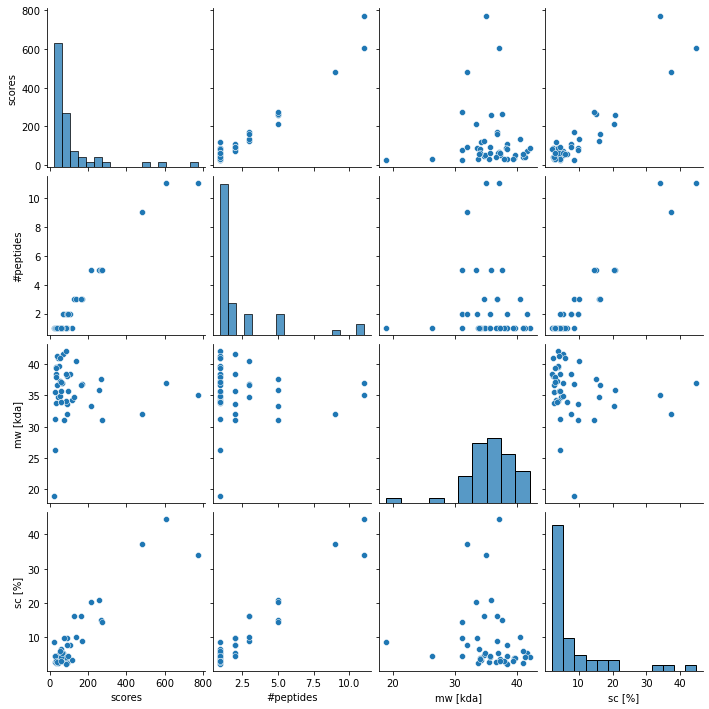

In [20]:
sns.pairplot(data=gel_slice_ox, vars=['scores', '#peptides', 'mw [kda]', 'sc [%]'])


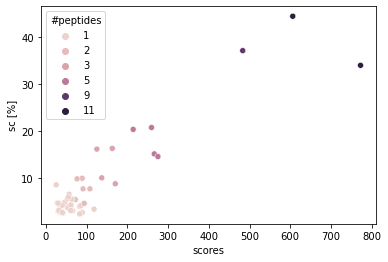

In [21]:
sns.scatterplot(data = gel_slice_ox, x = gel_slice_ox["scores"],\
                y = gel_slice_ox["sc [%]"], hue = gel_slice_ox["#peptides"]);

## Filter Data using different protein property conditions 

#### Using Peptides 

In [22]:
# how many proteins are identified with 0, 1, >2 and at least 10 peptide count ?

filt_0 = gel_slice_anox[gel_slice_anox["#peptides"]== 0]
filt_1 = gel_slice_anox[gel_slice_anox["#peptides"]== 1]
filt_gt_2 = gel_slice_anox[(gel_slice_anox["#peptides"] >= 2) & (gel_slice_anox["#peptides"] < 10)]
filt_al_10 = gel_slice_anox[gel_slice_anox["#peptides"]>= 10]


fltrd_0 =gel_slice_ox[gel_slice_ox["#peptides"]== 0]
fltrd_1 =gel_slice_ox[gel_slice_ox["#peptides"]== 1]
fltrd_gt_2 = gel_slice_ox[(gel_slice_ox["#peptides"] >= 2) & (gel_slice_ox["#peptides"] < 10)]
fltrd_al_10 =gel_slice_ox[gel_slice_ox["#peptides"]>= 10]



print("Anoxic")
print()
print("Number of proteins identified by 0 peptide:",filt_0.shape[0])
print("Number of proteins identified by 1 peptide:",filt_1.shape[0])
print("Number of proteins identified by more that 2  peptides:",filt_gt_2.shape[0])
print("Number of proteins identified by at least 10 peptides:",filt_al_10.shape[0])
print()

print("Oxic")
print()
print("Number of proteins identified by 0 peptide:", fltrd_0.shape[0])
print("Number of proteins identified by 1 peptide:", fltrd_1.shape[0])
print("Number of proteins identified by more than 2  peptides:", fltrd_gt_2.shape[0])
print("Number of proteins identified by at least 10 peptides:", fltrd_al_10.shape[0])


Anoxic

Number of proteins identified by 0 peptide: 0
Number of proteins identified by 1 peptide: 17
Number of proteins identified by more that 2  peptides: 20
Number of proteins identified by at least 10 peptides: 2

Oxic

Number of proteins identified by 0 peptide: 0
Number of proteins identified by 1 peptide: 28
Number of proteins identified by more than 2  peptides: 15
Number of proteins identified by at least 10 peptides: 2


In [23]:
print("Anoxic")
print()
print(f"fraction of proteins identified by 0 peptide: {(len(filt_0)/len(gel_slice_anox)*100):.1f}%")
print(f"fraction of proteins identified by 1 peptide: {(len(filt_1)/len(gel_slice_anox)*100):.1f}%")
print(f"fraction of proteins identified by more than 2  peptides:{(len(filt_gt_2) /len(gel_slice_anox)*100):.1f}%")
print(f"fraction of proteins identified by at least 10 peptides:{(len(filt_al_10)/len(gel_slice_anox)*100):.1f}%")

print()

print("Oxic")
print()
print(f"fraction of proteins identified by 0 peptide: {(len(fltrd_0)/len(gel_slice_ox)*100):.1f}%")
print(f"fraction of proteins identified by 1 peptide: {(len(fltrd_1)/len(gel_slice_ox)*100):.1f}%")
print(f"fraction of proteins identified by more than 2  peptides:{(len(fltrd_gt_2) /len(gel_slice_ox)*100):.1f}%")
print(f"fraction of proteins identified by at least 10 peptides:{(len(fltrd_al_10)/len(gel_slice_ox)*100):.1f}%")

Anoxic

fraction of proteins identified by 0 peptide: 0.0%
fraction of proteins identified by 1 peptide: 43.6%
fraction of proteins identified by more than 2  peptides:51.3%
fraction of proteins identified by at least 10 peptides:5.1%

Oxic

fraction of proteins identified by 0 peptide: 0.0%
fraction of proteins identified by 1 peptide: 62.2%
fraction of proteins identified by more than 2  peptides:33.3%
fraction of proteins identified by at least 10 peptides:4.4%


##### **which peptide is identified by 0 peptide ?**

In [24]:
fltrd_0 = gel_slice_ox["#peptides"]== 0
gel_slice_ox[fltrd_0]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]


### Using Sequence Coverage 

In [25]:
filt_al_25 = gel_slice_anox[gel_slice_anox["sc [%]"] <= 25]
filt_gt_25 = gel_slice_anox[gel_slice_anox["sc [%]"] > 25]

fltrd_al_25 =gel_slice_ox[gel_slice_ox["sc [%]"] <=25]
fltrd_gt_25 =gel_slice_ox[gel_slice_ox["sc [%]"] >25]

print("Anoxic")
print()
print("Number of proteins identified by at most 25 % sequence coverage:",filt_al_25.shape[0]) 
print("Number of proteins identified by at least 25 sequence coverage:",filt_gt_25.shape[0]) 
print("_"*20)
print("Oxic")
print()
print("Number of proteins identified by at most 25 % sequence coverage:",fltrd_al_25.shape[0]) 
print("Number of proteins identified by at least 25 sequence coverage:",fltrd_gt_25.shape[0]) 


Anoxic

Number of proteins identified by at most 25 % sequence coverage: 36
Number of proteins identified by at least 25 sequence coverage: 3
____________________
Oxic

Number of proteins identified by at most 25 % sequence coverage: 42
Number of proteins identified by at least 25 sequence coverage: 3


### Generate dataframe of common proteins

In [26]:
# Merge the two dataframes on the "Protein" column using an inner join.
# common_proteins now contains only the rows where the "Protein" column exists in both dataframes.


cmon_proteins = pd.merge(gel_slice_anox, gel_slice_ox, on="accession", how="inner")
cmon_proteins

,accession,protein_x,mw [kda]_x,pi_x,scores_x,#peptides_x,sc [%]_x,#alt. proteins_x,rms [da]_x,protein_y,mw [kda]_y,pi_y,scores_y,#peptides_y,sc [%]_y,#alt. proteins_y,rms [da]_y
0,EbN1_C05020,pheA prephenate dehydratase AND chorismate mut...,38.343847,6.024432,95.2,2,7.909605,1,0.031916,pheA prephenate dehydratase AND chorismate mut...,38.343847,6.024432,108.0,2,7.627119,1,0.059283
1,EbN1_C05360,ilvE branched-chain-amino-acid transaminase 58...,34.283378,6.022426,348.4,8,21.895425,1,0.051720,ilvE branched-chain-amino-acid transaminase 58...,34.283378,6.022426,118.2,1,3.267974,1,0.014985
2,EbN1_C05540,"takP1 TRAP transporter, periplasmic binding pr...",39.577022,9.341917,104.0,1,3.888889,1,0.005793,"takP1 TRAP transporter, periplasmic binding pr...",39.577022,9.341917,35.2,1,3.888889,1,0.011207
3,EbN1_C05550,"takP2 TRAP transporter, periplasmic binding pr...",39.723954,8.894983,70.1,1,3.888889,1,0.051381,"takP2 TRAP transporter, periplasmic binding pr...",39.723954,8.894983,50.5,1,3.888889,1,0.019381
4,EbN1_C06240,hmbS hydroxymethylbilane synthase 676229:67717...,33.596668,5.352999,75.0,2,9.872611,1,0.047391,hmbS hydroxymethylbilane synthase 676229:67717...,33.596668,5.352999,89.0,2,9.872611,1,0.030202
5,EbN1_C06420,fbb fructose-bisphosphatase 696589:697590 reve...,36.782818,5.720660,240.7,5,13.813814,1,0.067391,fbb fructose-bisphosphatase 696589:697590 reve...,36.782818,5.720660,170.3,3,8.708709,1,0.052977
6,EbN1_C06920,"sucD succinate-CoA ligase (ADP-forming), alpha...",31.129110,7.763599,300.9,6,24.242424,1,0.061316,"sucD succinate-CoA ligase (ADP-forming), alpha...",31.129110,7.763599,76.4,2,9.764310,1,0.044898
7,EbN1_C07390,EbN1_C07390 PhoH-like protein 789994:790965 re...,35.814722,5.319701,386.0,6,18.575851,1,0.036765,EbN1_C07390 PhoH-like protein 789994:790965 re...,35.814722,5.319701,259.2,5,20.743034,1,0.018365
8,EbN1_C14890,cysD sulfate adenylyltransferase (ATP sulfuryl...,34.686629,6.035383,65.7,2,12.171053,1,0.200529,cysD sulfate adenylyltransferase (ATP sulfuryl...,34.686629,6.035383,125.1,3,16.118421,1,0.035914
9,EbN1_C22910,hldD ADP-glyceromanno-heptose 6-epimerase 2360...,35.568479,5.248726,50.8,1,2.821317,1,0.073941,hldD ADP-glyceromanno-heptose 6-epimerase 2360...,35.568479,5.248726,30.3,1,2.821317,1,0.093144


In [27]:
print(cmon_proteins.shape[0])

23


- It woukd be nice to check if the protein identifed by 0 peptide is common to both slices. It turned out to be but identified in the anoxic gel slice sample by 1 peptide.

In summary, a Mascot score without a peptide identification suggests that while the spectrum matches a peptide, the match may not be strong or unique enough to confidently assign it to a specific peptide. Researchers typically establish a threshold Mascot score above which they consider an identification reliable, and results falling below this threshold are considered inconclusive or false identifications. It's crucial to interpret the results in the context of the specific experiment and to consider factors like data quality, database coverage, and the presence of post-translational modifications.

### Generate dataframe of specific proteins

In [28]:
# Identify unique proteins in df1
gs_anox_unique = gel_slice_anox[~gel_slice_anox["accession"].isin(cmon_proteins["accession"])]

# Identify unique proteins in df2
gs_ox_unique = gel_slice_ox[~gel_slice_ox["accession"].isin(cmon_proteins["accession"])]

print(f"gel_slice_anox contain {len(gs_anox_unique)} unique proteins")
print(f"gel_slice_ox contain {len(gs_ox_unique)} unique proteins")

gel_slice_anox contain 16 unique proteins
gel_slice_ox contain 22 unique proteins


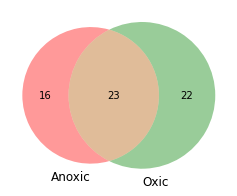

In [29]:
fig, ax = plt.subplots(figsize = (4,4))

venn2(subsets={'10': 16, '01': 22, '11': 23}, set_labels=('Anoxic', 'Oxic'));
ax.set
plt.savefig("venn_gel.pdf")  # Save the figure as a PNG (you can change the format as needed)


In [30]:
gs_anox_unique[:5]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
4,EbN1_C06030,purC phosphoribosylaminoimidazole-succinocarbo...,33.415483,5.847612,26.0,1,3.215434,1,0.089311
9,EbN1_C10010,EbN1_C10010 Cell division protein 1060505:1060...,11.099714,7.703049,30.3,1,7.000000,1,0.076065
10,EbN1_C12720,"rfbB2 dTDP-glucose 4,6-dehydratase 1342155:134...",39.064537,5.879626,34.5,1,2.272727,1,0.023591
12,EbN1_C15700,boxE 3-oxoadipyl-CoA thiolase 1648069:1649277 ...,41.804711,7.740852,28.3,1,2.985075,1,0.019352
13,EbN1_C20710,"EbN1_C20710 Conserved hypothetical protein, me...",37.836122,5.702707,27.2,1,6.432749,1,0.067562


In [31]:
s = gs_anox_unique["#peptides"].sum()
s

20

In [32]:
gs_ox_unique[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00080,"EbN1_C00080 Conserved hypothetical protein, DU...",31.174752,4.880996,27.9,1,4.609929,1,0.000326
5,EbN1_C05740,bioB biotin synthase 622521:623543 forward MW:...,37.041688,6.193626,65.5,1,2.941176,1,0.021296
6,EbN1_C05940,fbaA fructose-bisphosphate aldolase 643830:644...,38.165241,5.537280,89.1,1,2.542373,1,0.041094
11,EbN1_C08110,rsmH 16S rRNA (cytosine1402-N4)-methyltransfer...,33.740921,9.841247,33.5,1,2.564103,1,0.030391
12,EbN1_C12540,ackA1 acetate kinase 1319467:1320651 forward M...,41.607733,7.089604,72.1,2,5.329949,1,0.040002
13,EbN1_C12580,aroB 3-dehydroquinate synthase 1328399:1329481...,38.471307,6.011003,33.0,1,4.444444,1,0.044704
14,EbN1_C14500,gshB glutathione synthase 1527440:1528399 reve...,34.674934,5.351418,45.6,1,4.702194,1,0.007958
16,EbN1_C16790,"EbN1_C16790 Conserved hypothetical protein, Ly...",41.039545,6.166283,41.8,1,2.412869,1,0.074283
17,EbN1_C18300,prs2 ribose-phosphate diphosphokinase 1924720:...,34.045776,6.721766,82.8,1,3.833866,1,0.032741
19,EbN1_C21940,rplF 50S ribosomal protein L6 2268008:2268541 ...,18.942158,10.103846,25.2,1,8.474576,1,0.062601


Characteristic difference bbetween slices lies in the context-specific properties of Protein. Therefore protein responsible for intensity must be contained in the condition specific protein (i.e specific proteins oxygenic slice ). Since they fall on the marker at around 35 MW Kda, we can find which proteins in the oxic specific proteins around this molecuylar weight.

In [33]:
intensity_contri = gs_ox_unique[gs_ox_unique["mw [kda]"].between(35, 37)]
intensity_contri

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
32,EbN1_C29200,argF ornithine carbamoyltransferase 3021526:30...,35.639238,5.059395,61.5,1,4.166667,1,0.037190
36,EbN1_C35850,"sbp ABC transporter, periplasmic solute-bindin...",36.709714,7.712542,162.9,3,16.265060,1,0.050708


In [34]:
gs_ox_unique["#peptides"].sum()


25

# Sorting

In [35]:
gs_anox_sorted = gel_slice_anox.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)

gs_ox_sorted = gel_slice_ox.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)

In [36]:
first_10_anox = gs_anox_sorted.iloc[:10]
first_10_anox[:5]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
23,EbN1_C28240,"futA ABC transporter, periplasmic solute-bindi...",37.050188,8.990315,1558.2,22,65.191740,1,0.143688
29,EbN1_C34540,tsf elongation factor Ts 3551465:3552355 forwa...,31.096564,5.393097,611.1,12,27.027027,1,0.058440
33,EbN1_C38730,mdh malate dehydrogenase 3977250:3978239 forwa...,35.009623,6.100270,386.7,8,24.620061,1,0.038058
8,EbN1_C07390,EbN1_C07390 PhoH-like protein 789994:790965 re...,35.814722,5.319701,386.0,6,18.575851,1,0.036765
1,EbN1_C05360,ilvE branched-chain-amino-acid transaminase 58...,34.283378,6.022426,348.4,8,21.895425,1,0.051720


In [37]:
first_10_ox = gs_ox_sorted.head(10)
first_10_ox[:5]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
40,EbN1_C38730,mdh malate dehydrogenase 3977250:3978239 forwa...,35.009623,6.100270,772.4,11,34.042553,1,0.039639
30,EbN1_C28240,"futA ABC transporter, periplasmic solute-bindi...",37.050188,8.990315,606.0,11,44.542773,1,0.115044
39,EbN1_C37620,"etfA electron transfer flavoprotein, alpha sub...",31.939839,4.951269,483.2,9,37.187500,1,0.045402
35,EbN1_C34540,tsf elongation factor Ts 3551465:3552355 forwa...,31.096564,5.393097,275.0,5,14.527027,1,0.056605
24,EbN1_C26220,korB2 2-oxoglutarate:ferredoxin oxidoreductase...,37.631189,7.900107,266.1,5,15.099715,2,0.061909


#### Peptide sum and averages

In [38]:
# Sums

x = gel_slice_anox["#peptides"].sum()
y = gel_slice_ox["#peptides"].sum()
print("Total peptides in anoxic gel slice:", x)
print("Total peptides in oxic gel slice:", y)

Total peptides in anoxic gel slice: 128
Total peptides in oxic gel slice: 103


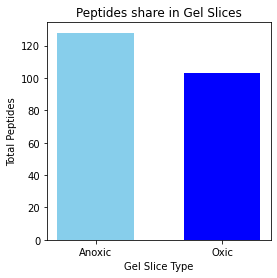

<Figure size 432x288 with 0 Axes>

In [39]:
fig, ax = plt.subplots(figsize = (4,4))
totals = [x, y]
labels = ['Anoxic', 'Oxic']
col = ['skyblue', 'blue']  # Define colors for the bars
bar_width = 0.6


plt.bar(labels, totals, color=col, width = bar_width, align='center',)# Create a bar plot
plt.xlabel('Gel Slice Type')# Add labels and a title
plt.ylabel('Total Peptides')
plt.title('Peptides share in Gel Slices')
plt.show()# Display the plot

plt.savefig("Peptides in Gel Slices")

Total proteins in anoxic gel slice: 128
Total proteins in oxic gel slice: 103


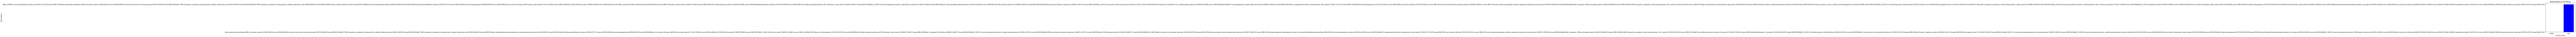

In [40]:

s = gel_slice_anox["protein"].sum()
t = gel_slice_ox["protein"].sum()
print("Total proteins in anoxic gel slice:", x)
print("Total proteins in oxic gel slice:", y)

fig, ax = plt.subplots(figsize = (4,4))
totals = [s, t]
labels = ['Anoxic', 'Oxic']
col = ['skyblue', 'blue']  # Define colors for the bars
bar_width = 0.6


plt.bar(labels, totals, color=col, width = bar_width, align='center',)# Create a bar plot
plt.xlabel('Gel Slice Type')# Add labels and a title
plt.ylabel('Total Proteins')
plt.title('Total Proteins in Gel Slices')
plt.show()# Display the plot

#plt.savefig("Total Proteins in Gel Slices.pdf")



#### Molecular weigth sum and averages

In [41]:
# Sums

a = gel_slice_anox["mw [kda]"].sum()
b = gel_slice_ox["mw [kda]"].sum()
print(f"Total size, protein in anoxic gel slice: {a:.0f} [kDa]")
print(f"Total size, protein in oxic gel slice: {b:.0f} [kDa]")

Total size, protein in anoxic gel slice: 1339 [kDa]
Total size, protein in oxic gel slice: 1612 [kDa]


In [42]:
# Averages


print(f"Average size, protein in anoxic gel slice: {gel_slice_anox['mw [kda]'].mean():.0f}[kDa]")
print(f"Average size, protein in oxic gel slice: {gel_slice_ox['mw [kda]'].mean():.0f}[kDa]")

Average size, protein in anoxic gel slice: 34[kDa]
Average size, protein in oxic gel slice: 36[kDa]


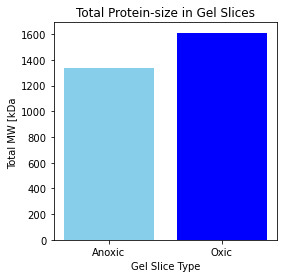

In [43]:
fig, ax = plt.subplots(figsize = (4,4))
totals = [a, b]
labels = ['Anoxic', 'Oxic']
col = ['skyblue', 'blue']  # Define colors for the bars
bar_width = 0.5
plt.bar(labels, totals, color=col)# Create a bar plot
plt.xlabel('Gel Slice Type')# Add labels and a title
plt.ylabel('Total MW [kDa ')
plt.title('Total Protein-size in Gel Slices')
plt.show()# Display the plot

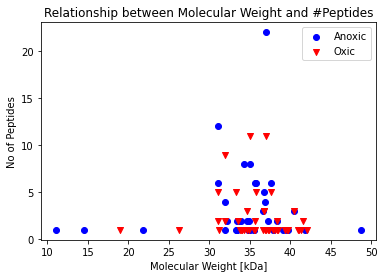

In [44]:
# Putting the figures together 

a = gel_slice_anox["mw [kda]"]
b = gel_slice_ox["mw [kda]"]

x = gel_slice_anox["#peptides"]
y = gel_slice_ox["#peptides"]

# Create a scatter plot
plt.scatter(a, x, label='Anoxic', color='blue', marker='o')
plt.scatter(b, y, label='Oxic', color='red', marker='v')

# Set labels and title
plt.xlabel('Molecular Weight [kDa]')
plt.ylabel('No of Peptides')
plt.title('Relationship between Molecular Weight and #Peptides')

plt.legend() # Add legend
plt.show() # Display the plot



### Protein of interest and visualization of presense /absence 

In [45]:
protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']


In [46]:
gel_slice_anox[gel_slice_anox["accession"].isin(protein)]


,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]


In [47]:
 gel_slice_ox[gel_slice_ox["accession"].isin(protein)]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
33,EbN1_C30410,had 6-hydroxycyclohex-1-ene-1-carbonyl-CoA deh...,38.357495,6.816576,83.0,1,2.253521,1,0.060715


In [48]:
prot_name = ['hbrA', 'bcrA', 'bcrB', 'bcrC', 'bcrD',
             'dch', 'had', 'Oah','boxA', 'boxB', 
             'boxC', 'boxD', 'GcdH', 'narG', 'nirS']

protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']

# Create a dictionary
protein_dict = dict(zip(prot_name, protein))


In [49]:
scores_anox = []
scores_ox = []

for prot_name in protein_dict.keys():
    protein_id = protein_dict[prot_name]
    
    if protein_id in gel_slice_anox['accession'].values:
        score = gel_slice_anox.loc[gel_slice_anox['accession'] == protein_id]['scores'].values
        scores_anox.append(score)
    else:
        scores_anox.append(0)  # Append 0 if protein not found in anoxic data
    
    if protein_id in gel_slice_ox['accession'].values:
        score_ox = gel_slice_ox.loc[gel_slice_ox['accession'] == protein_id]['scores'].values
        scores_ox.append(score_ox)
    else:
        scores_ox.append(0)  # Append 0 if protein not found in oxic data

# Convert the lists to numpy arrays for consistency
scores_anox = np.array(scores_anox,  dtype = "float")
scores_ox = np.array(scores_ox, dtype = "float")

print(scores_anox)
print(scores_ox)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  0.  0.  0.  0.  0. 83.  0.  0.  0.  0.  0.  0.  0.  0.]


/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_31687/1092020789.py:21: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_ox = np.array(scores_ox, dtype = "float")


In [50]:
df = pd.DataFrame({'Anox': scores_anox, 'Oxic': scores_ox}, index=protein_dict.keys())
df.head()

,Anox,Oxic
hbrA,0.0,0.0
bcrA,0.0,0.0
bcrB,0.0,0.0
bcrC,0.0,0.0
bcrD,0.0,0.0


In [51]:
# Transpose the DataFrame
transposed_df = df.T
transposed_df

,hbrA,bcrA,bcrB,bcrC,bcrD,dch,had,Oah,boxA,boxB,boxC,boxD,GcdH,narG,nirS
Anox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oxic,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


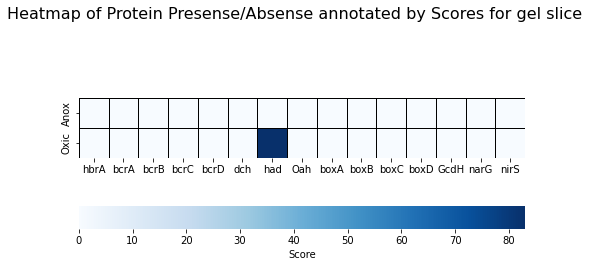

<Figure size 432x288 with 0 Axes>

In [52]:
# Create the custom colormap
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transposed_df, annot=False, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Score', 'orientation': 'horizontal'}, linewidth=.5, linecolor= "Black", square=True)
plt.suptitle('Heatmap of Protein Presense/Absense annotated by Scores for gel slice',  y=0.7, fontsize=16)
plt.show()
plt.savefig("heatmap shotgun.pdf")

In [53]:
ax= gel_slice_anox
x= gel_slice_ox

/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_31687/1566579836.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ax["Condition"] = "Anoxic"
/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_31687/1566579836.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Condition"] = "Oxic"


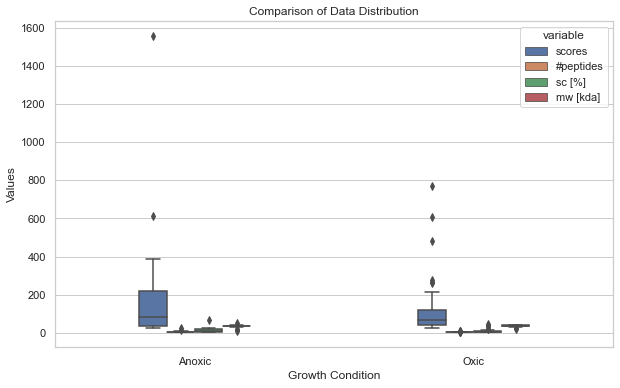

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have two dataframes: gel_slice_anox and gel_slice_ox
selected_cols = ["scores", "#peptides", "sc [%]", "mw [kda]"]
ax = ax[selected_cols]
x = x[selected_cols]

# Add a 'Condition' column to each dataframe
ax["Condition"] = "Anoxic"
x["Condition"] = "Oxic"

# Concatenate the two dataframes
combined_data = pd.concat([ax, x], ignore_index=True)

# Create a grouped box plot using Seaborn with a smaller width
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='Condition', y='value', hue='variable', data=pd.melt(combined_data, id_vars=['Condition']), width=0.4)

# Set labels and title
plt.xlabel('Growth Condition')
plt.ylabel('Values')
plt.title('Comparison of Data Distribution')

# Show the plot
plt.show()
